# Week 3

In this lab session we will see explore in more detail the following:
- Linear Regression
- Using linear regression on real world data
- Difference of Overfitting and Underfitting
- Polynomial Regression


# Linear Regression




In [1]:
# These packages used throughout, run me first!
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor

Let's generate some random data first.

# Task: write code to plot the data

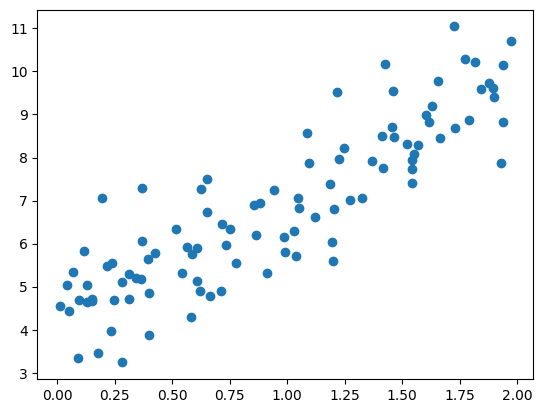

In [2]:
# Generating random data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Task: plot the data: y as a function of X
plt.scatter(X, y)

# Split the data into training and testing sets.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and Train the Model

In [4]:
# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

# Make Predictions

In [5]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the Model

Slope: [[2.79932366]]
Intercept: [4.14291332]
Mean Squared Error: 0.6536995137170021
(20, 1)
(20, 1)
(20, 1)


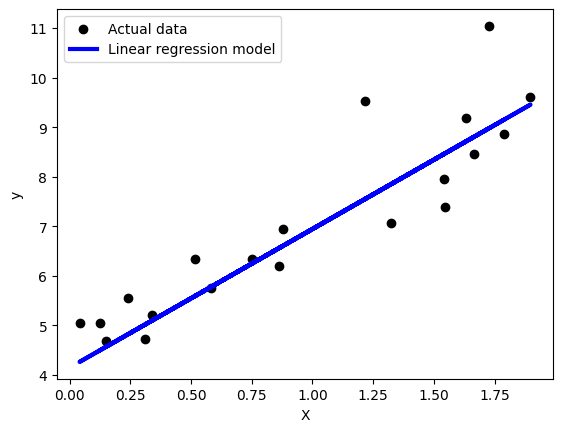

In [6]:
# Print the slope and intercept
print('Slope:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

print(X_test.shape)
print(y_test.shape)
print(y_pred.shape)

# Visualize the results
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Linear regression model')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Task: Ridge regression (use the same training and testing sets as above)


1.   Cross validate the ridge regression model to estimate the regularisation weight (alpha)
2.   Train a ridge regression with the learned alpha
3.   Evaluate the ridge regression model with the same code as above and comapre results

Hint -- use the codes:
*   from sklearn.linear_model import RidgeCV (for cross validate alpha)
*   from sklearn.linear_model import RidgeCV (for training)




# Linear Regression on real data

To train a Linear Regression classifier on real life data, we will be using the `diabetes` dataset publicly available and visualising the resulting value of `theta`.

The dataset is [described here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html?highlight=diabetes#sklearn.datasets.load_diabetes). **You can also hover over methods, library imports, and objects for quick info in Colab, handy!**

## Task
- Split the dataset into training and testing portions. Use an 80:20 split.
- Create the linear regression model

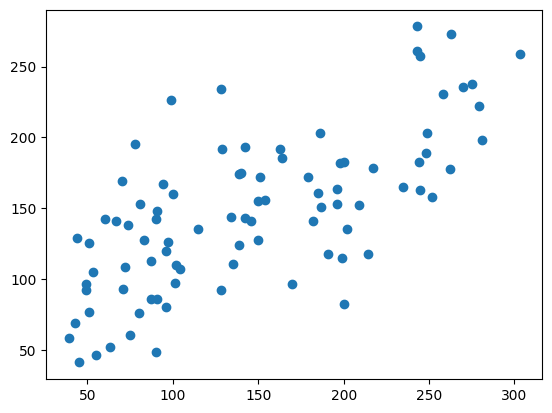

In [7]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
# None expands the dims, see: https://numpy.org/devdocs/user/basics.indexing.html#dimensional-indexing-tools
# This says
# 1. 'get all entries in the sample list',
# 2. 'create a new [] array dimension',
# 3. 'taking only the second index of each'
X = diabetes.data  # Features
y = diabetes.target  # Target variable

# Your code here: split the dataset into X_train_dia, X_test_dia, y_train_dia, y_test_dia
X_train_dia, X_test_dia, y_train_dia, y_test_dia = train_test_split(X, y, test_size=0.2)
# Your code here: create the model
model = LinearRegression()
# Your code here: train the model
model.fit(X_train_dia, y_train_dia)
# Your code here: make predictions
y_prediction = model.predict(X_test_dia)
# Your code here: print MSE
mse = mean_squared_error(y_test_dia, y_prediction)
mse
# Your code here: plot target vs prediction results
plt.scatter(y_test_dia, y_prediction)

# plt.show()


# Underfitting and Overfitting

The models have polynomial features of different degrees. We can see that a linear function (polynomial with degree 1) is not sufficient to fit the training samples. This is called **underfitting**.  
A polynomial of degree 4 approximates the true function almost perfectly. However, for higher degrees the model will **overfit** the training data, i.e. it learns the noise of the training data.  
We evaluate quantitatively overfitting / underfitting by using cross-validation. We calculate the **mean squared error (MSE)** on the validation set, the higher, the less likely the model generalizes correctly from the training data.

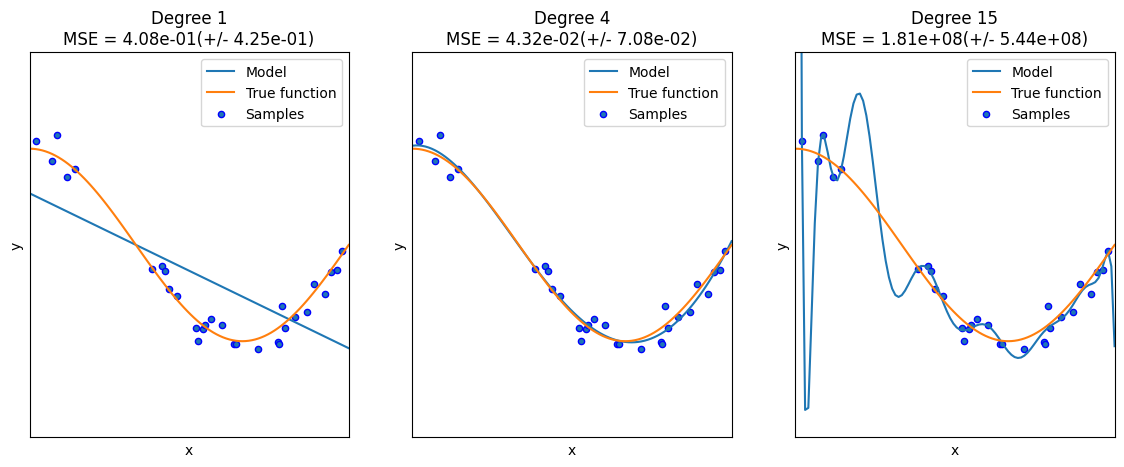

In [8]:
# Big code cell for some pretty graphs!

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

# Gradient Descent

This is an algorithm capable of finding optimal solutions to a wide range of problems.  
The parameters are tweaked to minimise the cost function.

However it is important to make sure that the **learning rate** is tweaked to an optimal value. Otherwise we can end up in a situation where the "step" is too small or too large. The undesired effects of that are as seen on the illustration below.

![Gradient Descent](https://raw.githubusercontent.com/wOOL/COM2028/master/W4/gd.png)

In addition, the cost functions very rarely look orderly like the ones used for demonstration pruposes above. Usually the have a complex shape.

This poses a new challenge - to avoid the Local minimum.

![Local Minimum](https://raw.githubusercontent.com/wOOL/COM2028/master/W4/local_min.png)

# Polynomial Regression

Polynomial Regression is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an n-th degree polynomial.  

Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted `E(y |x)`

If you need more information please read the following article in full:
https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/

In [16]:
# Generate some data
m = 100
X = 6 * np.random.rand(m, 1) - 3
X.reshape(-1, 1)
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Now that we have generated data, we can plot it for better visualisation.

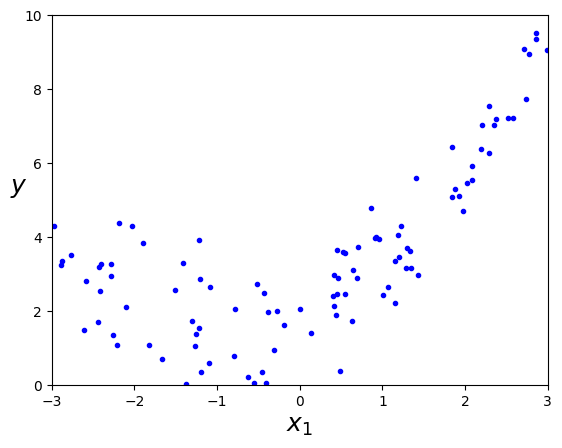

In [17]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Create and train the Polynomial Regression model
degree = 2  # You can adjust the degree of the polynomial
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X, y)    

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

## Task
- Let's plot the predictions in following

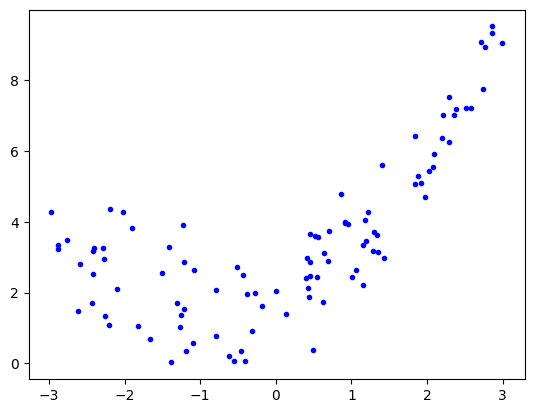

In [19]:
# Make predictions on the original X values
X_values = np.linspace(-3, 3, 100).reshape(-1, 1)
y_pred = model.predict(X_values)


# Your code here: plot the predictions
plt.plot(X, y, "b.", label='Actual data')

Need to consider which degree is most suitable, avoid **overfit** or **underfit**.

**Advantages** of using Polynomial Regression:

- Broad range of function can be fit under it.
- Polynomial basically fits wide range of curvature.
- Polynomial provides the best approximation of the relationship between dependent and independent variable.

**Disadvantages** of using Polynomial Regression

- These are too sensitive to the outliers.
- The presence of one or two outliers in the data can seriously affect the results of a nonlinear analysis.
- In addition there are unfortunately fewer model validation tools for the detection of outliers in nonlinear regression than there are for linear regression.


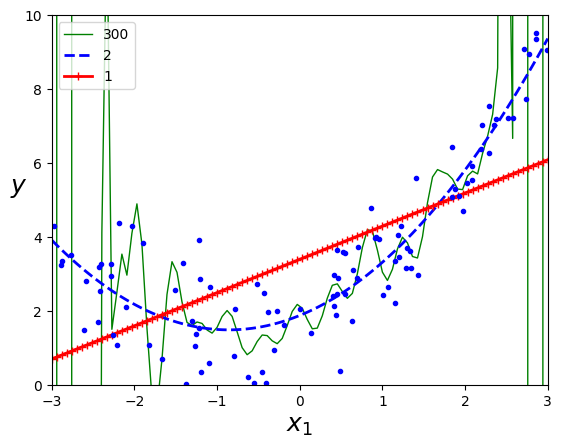

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_values)
    plt.plot(X_values, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()